# Question 1

In [461]:
#Komal MT19124
#Instructions:
#1. Please put the 5 folders in Data folder created in the directory having this pynb file and other neceesary files attached

In [462]:
from nltk.corpus import stopwords
import statistics
import numpy as np
from sklearn.manifold import TSNE
from operator import add,sub
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import matplotlib.pyplot as plt 
import pickle
import re
from natsort import natsorted
import string
import collections
from num2words import num2words
import math
import numpy as np
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [463]:
#Below are functions of preocessing steps for document and query
def readFile(filename):
    file = open(filename, 'r',encoding ="ascii", errors ="surrogateescape")
    document=file.read()
    file.close()
    return document
def whitespaceRemoval(document):
    return document.strip()
def stopWordsRemoval(tokens):
    stop_words=set(stopwords.words('english'))
    token_list=[token for token in tokens if not token in stop_words]
    return token_list
def puntuationsRemoval(document):
    table = str.maketrans('', '', string.punctuation)
    document = document.translate(table)
    return document
def tokenization(document):
    token_list=word_tokenize(document)
    return token_list
def lowerCase(tokens):
    token_list=[token.lower() for token in tokens]
    return token_list
def porterStemmer(tokens):
    ps=PorterStemmer()
    token_list=[ps.stem(token) for token in tokens]
    return token_list
def numbersremoval(document):
    document=re.sub(r'\d+','',document)
    return document
def numbersToWords(document):
    temp = re.findall(r'\d+', document) 
    res = list(map(int, temp)) 
    s=""
    for i in res:
        s=s+num2words(i)+" "
    return s;

In [464]:
#preprocessing steps applied to document and query
def documentToTerms(document):
    token_list=[]
    #print("Number To words Convertion")
    string_of_numbers=numbersToWords(document)
    #print(string_of_numbers)
    document=document+" "+string_of_numbers
    #print(document)
    #Whitespace removal
    #print("Whitespace removal")
    document=whitespaceRemoval(document)
    #Punctuations Removal
    #print("Puntuations removal")
    document=puntuationsRemoval(document)
#     #removing numbers
    document=numbersremoval(document)
#     #print("Removal of Numbers")
    #print(document)
    #tokenization
    #print("Tokenization")
    token_list=tokenization(document)
#     #stop words removal
    #print("Stop Words Removal")
    #token_list=stopWordsRemoval(token_list)
    #print(token_list)
    #lower Case conversion
    #print("LowerCase Conversion")
    token_list=lowerCase(token_list)
    #print(token_list)
    #stemming
    #print("Stemming")
    token_list=porterStemmer(token_list)
    #print(token_list)
    return token_list

In [465]:
#Buidling inverted index
def invertedIndex(terms,document_id,vocab_id):
    for term in terms:
        if term in index:
            if(document_id in index[term][1]):
                index[term][1][document_id]+=1
            else:
                index[term][0]+=1
                index[term][1][document_id]=1
        else:
            vocab_id+=1
            vocab[vocab_id]=term
            index[term]=[]
            index[term].append(1)
            index[term].append({})
            index[term][1][document_id]=1
    return vocab_id

In [466]:
# #Main function for creating the index
# folders=natsorted(os.listdir("Data/"))
# #folders=['comp.graphics']
# document_details={} #storing details per document id
# vocab={} #storig vocan terms and id
# index={} #index for storing term and document
# doc_id=-1
# vocab_id=-1
# for folder in folders:
#     fpath='Data/'+ folder
#     if(os.path.isdir(fpath)):
#         file_names=natsorted(os.listdir("Data/" + folder))
#         #file_names=["37261"]
#         for file_name in file_names:
#             #reading the document
#             doc_id+=1
#             document_details[doc_id]=[]
#             document_details[doc_id].append(folder)
#             document_details[doc_id].append(file_name)
#             document=readFile("Data/" + folder+"/"+file_name)
#             #print(document)
#             terms=list(documentToTerms(document))
#             #inverted index prepration
#             #print("Inverted Index Formation")
#             vocab_id=invertedIndex(terms,doc_id,vocab_id)
# doc_id+=1
# vocab_id+=1
# print("Inverted Index Formation")
# print(index)

In [467]:
#saving the files
# with open('index.pickle', 'wb') as handle:
#     pickle.dump(index, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('document_details.pickle', 'wb') as handle:
#     pickle.dump(document_details, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('vocab.pickle', 'wb') as handle:
#     pickle.dump(vocab, handle, protocol=pickle.HIGHEST_PROTOCOL)

#loading the files
with open('index.pickle', 'rb') as handle:
    index = pickle.load(handle)
with open('document_details.pickle', 'rb') as handle:
    document_details = pickle.load(handle)
with open('vocab.pickle', 'rb') as handle:
    vocab = pickle.load(handle)

doc_id=len(document_details)
vocab_id=len(vocab)


In [468]:
print("No of documents:",len(document_details))
print("Vocab length:",len(vocab))

No of documents: 5000
Vocab length: 53583


In [469]:
def lengthDocuments(): #calaclates the length of each documents and stores in length
    length=([0 for i in range(doc_id)]) #storing tf
    for term,posting in index.items():
        idf=math.log(doc_id/posting[0])
        for document,frequency in posting[1].items():
            tf=1+math.log(frequency)
            length[document]+=round(tf*idf*tf*idf,4)
    return length

In [470]:
def displayOld(score,k):#displaying to k documents
    if k<=len(score):
        print("Top "+str(k)+" items are:")
        print(["Doc id:"+str(score[i][0])+" Document:"+str(document_details[score[i][0]])+" Score: "+str(round(score[i][1],4)) for i in range(k)])
    else:
        print("Top ",len(score)," items are:")
        print(["Doc id:"+str(score[i][0])+" Document:"+str(document_details[score[i][0]])+" Score: "+str(round(score[i][1],4)) for i in range(len(score))])

In [471]:
def cosineSimilairity(length): #performs cosine similarity assuming query vector is 1 for term present in query i.e fast cosine
    score=[]
    score=([[0,i] for i in range(doc_id)])
    for term in query:
        if term in index:
            idf=math.log(doc_id/index[term][0])
            for document,frequency in index[term][1].items():
                tf=1+math.log(frequency)
                score[document][0]+=round(tf*idf,4) 
    score_res=([[i,score[i][0]/length[i]] for i in range(doc_id)])
    return score_res

In [472]:
query="Population 1 billion"
k=20
query=documentToTerms(query)
print(query)
length=lengthDocuments()
length=([round(math.sqrt(x),4) for x in length])
score=cosineSimilairity(length)
score.sort(key = lambda x: x[1],reverse=True)
displayOld(score,k)

['popul', 'billion', 'one']
Top 20 items are:
["Doc id:4800 Document:['talk.politics.misc', '178916'] Score: 0.194", "Doc id:4135 Document:['talk.politics.misc', '176981'] Score: 0.1514", "Doc id:4566 Document:['talk.politics.misc', '178681'] Score: 0.1477", "Doc id:4876 Document:['talk.politics.misc', '178992'] Score: 0.1453", "Doc id:4884 Document:['talk.politics.misc', '179000'] Score: 0.1421", "Doc id:3248 Document:['sci.space', '60899'] Score: 0.1355", "Doc id:3302 Document:['sci.space', '60953'] Score: 0.13", "Doc id:1430 Document:['rec.sport.hockey', '53830'] Score: 0.1291", "Doc id:2910 Document:['sci.med', '59550'] Score: 0.129", "Doc id:3335 Document:['sci.space', '60986'] Score: 0.125", "Doc id:3250 Document:['sci.space', '60901'] Score: 0.1224", "Doc id:4510 Document:['talk.politics.misc', '178625'] Score: 0.1222", "Doc id:4599 Document:['talk.politics.misc', '178714'] Score: 0.1221", "Doc id:4108 Document:['talk.politics.misc', '176954'] Score: 0.1217", "Doc id:3259 Docume

# Question 2

In [473]:
# all work raleted to query processing
#Assumption : words not in query are ommited and not included in vocab

def queryToVector(query): #forming query vector from query.
    query_original=[0 for i in range(len(vocab))]
    res = dict((v,k) for k,v in vocab.items())
    for key,value in query.items():
        if(key in res):
            query_original[res[key]]=value
    return query_original
    
def tfidfQuery(query_dict): # calcluting tfidf of query terms
    for key,value in query_dict.items():
        tf=1+math.log(value)
        idf=math.log(doc_id/index[key][0]) if key in index else 0
        query_dict[key]=round(tf*idf,4)
    return query_dict

def queryWork(query): # all major work w.r.t query
    query=documentToTerms(query) #preprocessing query
    query_dict={} # calclating tf for query vector
    for term in query:
        if term in query_dict:
            query_dict[term]+=1
        else:
            query_dict[term]=1
    query_dict=tfidfQuery(query_dict)
    query_vector=queryToVector(query_dict)
    return query_vector

In [474]:
def display(score,k,relvant):#displaying to k documents
    result=set()
    if k<=len(score):
        result=[score[i] for i in range(k)]
    else:
        result=[score[i] for i in range(k)]
    count=1
    asterisk_doc=set()
    for i in result:
        if(i[0] in relvant):
            print(str(count)," *   Doc id:",str(i[0]),"  Document: ",document_details[i[0]]," Score:",str(round(i[1],4)))
            asterisk_doc.add(i[0])
        else:
            print(str(count),"Doc id:",str(i[0]),"  Document: ",document_details[i[0]]," Score:",str(round(i[1],4)))
        count+=1
    return result,asterisk_doc

In [475]:
def cosineSimilairityNew(query_updated,length):
    score=[]
    score=([[0,i] for i in range(doc_id)])
    temp=[[i,e] for i,e in enumerate(query_updated) if e != 0]
    for i,e in temp:
        term=vocab[i]
        if term in index:
            idf=math.log(doc_id/index[term][0])
            for document,frequency in index[term][1].items():
                tf=1+math.log(frequency)
                score[document][0]+=round(e*tf*idf,4)  #wq*tf*idf
    score_res=([[i,score[i][0]/length[i]] for i in range(doc_id)])
    return score_res

In [476]:
def documentToVector(document_id): #converting a partuclar docuemnent to vector form
    doc_vector=[0 for i in range(len(vocab))]
    res = dict((v,k) for k,v in vocab.items())
    for key,value in index.items():
        idf=math.log(doc_id/index[key][0])
        if(document_id in value[1]):
            tf=1+math.log(value[1][document_id])
            doc_vector[res[key]]=round(tf*idf,4)
    return doc_vector

In [477]:
def updateQuery(relevant,non_relevant,query,a,b,c):
    centroid_relevant=[0 for i in range(len(vocab))]
    centroid_irrelevant=[0 for i in range(len(vocab))]
    for i in relevant:
        centroid_relevant=list( map(add, centroid_relevant, i) )
    centroid_relevant=[(b*x)/len(relevant) for x in centroid_relevant]
    for i in non_relevant:
        centroid_irrelevant=list( map(add, centroid_irrelevant,i) )
    centroid_irrelevant=[(c*x)/len(non_relevant) for x in centroid_irrelevant]
    query=[a*x for x in query]
    query_updated= list(map(add,query,list( map(sub, centroid_relevant, centroid_irrelevant) )))
    query_updated=[round(x,4) for x in query_updated]
    query_updated = [0 if i < 0 else i for i in query_updated] #negative terms are set to 0
    return query_updated

In [478]:
def tsne(relevant,irrelavant, query_vector):
    tsne = TSNE(n_components=2, random_state=0)
    feature_vector = []
    labels = []
    for i in relevant:
        feature_vector.append(i)
        labels.append(0)
    for i in irrelavant:
        feature_vector.append(i)
        labels.append(1)
    feature_vector.append(query_vector)
    labels.append(2)
    transformed_data = tsne.fit_transform(np.array(feature_vector))
    k = np.array(transformed_data)
    t = ("Relevant", "Non-Relevant", "Query")
    plt.scatter(k[:, 0], k[:, 1], c=labels, label="Violet-R, Aqua-NR")
    plt.title("Rocchio Algorithm")
    plt.legend()
    plt.grid(True)
    plt.show()

In [479]:
def plottingPrecisionRecall(x,y):
    plt.plot(x, y) 
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

In [480]:
def calculatingPrecisionRecallMAP(score,ground_truth,k):
    result=set()
    recall=[0]
    precision=[1]
    temp=0 #count of relevant uptil now
    map_value=0
    count=0
    if k<=len(score):
        result=[x[0] for x in score[0:k]]
    else:
        result=[x[0] for x in score[0:len(score)]]
    for i in result:
        count+=1
        if(document_details[i][0]==ground_truth):
            temp+=1
            map_value+=temp/count
        precision.append(temp/count)
        recall.append(temp/1000)
    map_value=map_value/temp
    plottingPrecisionRecall(recall,precision)
    return map_value

In [481]:
def intialResult(query_vector):
    score=cosineSimilairityNew(query_vector,length)
    score.sort(key = lambda x: x[1],reverse=True)
    print("Documents from intial query")
    result,asterisk_doc=display(score,k,{})
    result=set([i[0] for i in result])
    return result,asterisk_doc

In [482]:
def RocchiooAlgorithm(query,a,b,c,k,p,ground_truth,length,result,asterisk_doc):
    relevant=set() #storing relavnt documenst
    irrelevant=set() #storing irrerlavant documents
    query_vector=queryWork(query) #processing query to query vector
    p=(int)((p*k)/100) # no of relavant doc to be marked at each iteartion
    map_=[]
    for m in range(1,4):
        print("Feedback Iteration ",m)
        print("Enter ",p," relevant documents id of ",ground_truth)
        temp=input()
        temp=set(int(i) for i in temp.split(" "))
        if(len(temp)<p):
            temp=set(list(temp)[0:len(temp)])
        else:
            temp=set(list(temp)[0:p])
        relevant=temp
        print("Marked Relevant Docuemnst:",relevant)
        irrelevant=result.difference(relevant.union(asterisk_doc))
        print("Marked Irrelevant Docuemnst::",irrelevant)
        vector_relevant=[] # storing relevant documents vector 
        vector_irrelevant=[] #storing irrelevant documenst vector
        for i in relevant:
            vector_relevant.append(documentToVector(i))
        for i in irrelevant:
            vector_irrelevant.append(documentToVector(i))
        query_vector=updateQuery(vector_relevant,vector_irrelevant,query_vector,a,b,c)
        score=cosineSimilairityNew(query_vector,length)
        score.sort(key = lambda x: x[1],reverse=True)
        result,asterisk_doc=display(score,k,relevant)
        result=set([i[0] for i in result])
        tsne(vector_relevant,vector_irrelevant,query_vector)
        map_.append(calculatingPrecisionRecallMAP(score,ground_truth,k))
    return map_

In [483]:
def mapCalulcation(map_overall,no_query):
    sum_=0
    no_iterations=len(map_overall[0])
    for i in range(no_iterations):
        sum_=sum(j[i] for j in map_overall)
        print("At ",i+1,"iteration MAP is:")
        print(sum_/no_query)

# Part A/B/C/D/E/F

In [ ]:
# Relavant documents input for first query
# 2040 2864 2753 2477 2962 2760 2234 2848 2421 2661
# 2878 2543 2526 2983 2859 2683 2952 2567 2850 2914
# 2848 2864 2962 2693 2664 2692 2682 2755 2908 2430

# Relavant documents input for second query
# 4426 4622 4638 4989 4432 4598 4928 4701 4102 4763
# 4226 4472 4580 4317 4299 4378 4305 4320 4686 4361
# 4580 4426 4299 4305 4378 4472 4317 4360 4320 4828

# Relavant documents input for third query
# 2010 2011 2730 2794 2097 2115 2046 2200 2770 2424
# 2118 2114 2117 2543 2459 2404 2646 2698 2644 2598
# 2115 2526 2487 2643 2486 2483 2645 2395 2914 2693

Query: Pretty good opinions on biochemistry machines  Ground Truth: sci.med
Documents from intial query
1 Doc id: 361   Document:  ['comp.graphics', '38523']  Score: 1.2085
2 Doc id: 2040   Document:  ['sci.med', '58082']  Score: 1.1775
3 Doc id: 435   Document:  ['comp.graphics', '38597']  Score: 0.8356
4 Doc id: 612   Document:  ['comp.graphics', '38774']  Score: 0.8244
5 Doc id: 2864   Document:  ['sci.med', '59504']  Score: 0.7584
6 Doc id: 2753   Document:  ['sci.med', '59393']  Score: 0.7067
7 Doc id: 2477   Document:  ['sci.med', '59116']  Score: 0.6994
8 Doc id: 2962   Document:  ['sci.med', '59602']  Score: 0.6586
9 Doc id: 2760   Document:  ['sci.med', '59400']  Score: 0.6565
10 Doc id: 675   Document:  ['comp.graphics', '38837']  Score: 0.6549
11 Doc id: 2234   Document:  ['sci.med', '58872']  Score: 0.6515
12 Doc id: 2848   Document:  ['sci.med', '59488']  Score: 0.6503
13 Doc id: 2421   Document:  ['sci.med', '59060']  Score: 0.6255
14 Doc id: 2661   Document:  ['sci.med',

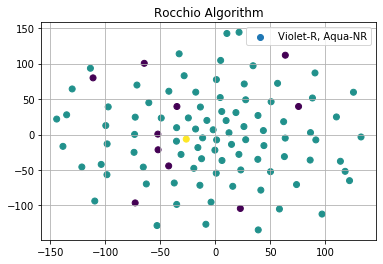

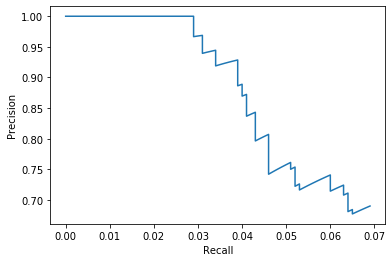

Feedback Iteration  2
Enter  10  relevant documents id of  sci.med
2878 2543 2526 2983 2859 2683 2952 2567 2850 2914
Marked Relevant Docuemnst: {2850, 2914, 2526, 2567, 2952, 2983, 2859, 2543, 2683, 2878}
Marked Irrelevant Docuemnst:: {2563, 2819, 2309, 2569, 3593, 2830, 4114, 2585, 2593, 2594, 2343, 2344, 2601, 2346, 2349, 3119, 2616, 4670, 2110, 2113, 4415, 2115, 2118, 2119, 3398, 4937, 4941, 4433, 4179, 2644, 4436, 2646, 2395, 2908, 4956, 2405, 4199, 2664, 4200, 4457, 2410, 2932, 2682, 2430, 2175, 2690, 2692, 2693, 392, 2698, 915, 4760, 2212, 4778, 4268, 691, 2483, 2484, 2486, 2743, 4792, 2745, 2487, 954, 4538, 4798, 3004, 2755, 2244, 3784, 2251, 4557, 215, 2272, 2795, 2541, 242, 2804, 2807, 4090}
1  *   Doc id: 2543   Document:  ['sci.med', '59183']  Score: 38.5636
2  *   Doc id: 2526   Document:  ['sci.med', '59165']  Score: 38.3864
3  *   Doc id: 2683   Document:  ['sci.med', '59323']  Score: 34.0582
4  *   Doc id: 2914   Document:  ['sci.med', '59554']  Score: 33.0805
5 Doc id: 

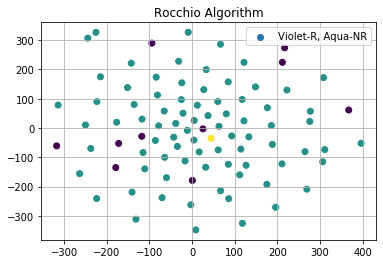

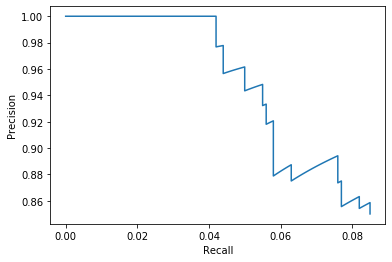

Feedback Iteration  3
Enter  10  relevant documents id of  sci.med
2848 2864 2962 2693 2664 2692 2682 2755 2908 2430
Marked Relevant Docuemnst: {2848, 2755, 2692, 2693, 2664, 2864, 2962, 2682, 2908, 2430}
Marked Irrelevant Docuemnst:: {2562, 2563, 2819, 2569, 2830, 4114, 2579, 2584, 2585, 2586, 2588, 4124, 2593, 2594, 2596, 2597, 2601, 2346, 2606, 2097, 2612, 2615, 2616, 2110, 4670, 2113, 2118, 3398, 2887, 2889, 4941, 4179, 2644, 2643, 2646, 4436, 2395, 4956, 2913, 2661, 2405, 4199, 4457, 2410, 2932, 2421, 2678, 2936, 2690, 2698, 2701, 2707, 915, 2200, 2212, 2980, 4268, 2733, 2988, 2483, 2484, 2486, 2487, 4792, 2234, 954, 2753, 2244, 2259, 2521, 2269, 2272, 2792, 2795, 2541, 242, 2804, 2549, 2807, 2303}
1 Doc id: 2526   Document:  ['sci.med', '59165']  Score: 54.9452
2 Doc id: 2543   Document:  ['sci.med', '59183']  Score: 52.4797
3  *   Doc id: 2693   Document:  ['sci.med', '59333']  Score: 49.9965
4  *   Doc id: 2848   Document:  ['sci.med', '59488']  Score: 48.9717
5  *   Doc id: 26

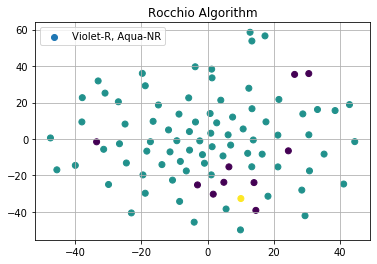

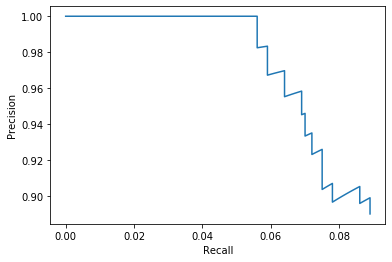

Query: Scientific tools for preserving rights and body  Ground Truth: talk.politics.misc
Documents from intial query
1 Doc id: 2794   Document:  ['sci.med', '59434']  Score: 1.0085
2 Doc id: 3684   Document:  ['sci.space', '61335']  Score: 1.0084
3 Doc id: 3734   Document:  ['sci.space', '61385']  Score: 0.8274
4 Doc id: 971   Document:  ['comp.graphics', '39655']  Score: 0.7436
5 Doc id: 3158   Document:  ['sci.space', '60809']  Score: 0.7133
6 Doc id: 3147   Document:  ['sci.space', '60797']  Score: 0.702
7 Doc id: 8   Document:  ['comp.graphics', '37920']  Score: 0.692
8 Doc id: 2011   Document:  ['sci.med', '58053']  Score: 0.692
9 Doc id: 2498   Document:  ['sci.med', '59137']  Score: 0.6667
10 Doc id: 2089   Document:  ['sci.med', '58131']  Score: 0.6477
11 Doc id: 4426   Document:  ['talk.politics.misc', '178540']  Score: 0.6423
12 Doc id: 3169   Document:  ['sci.space', '60820']  Score: 0.6311
13 Doc id: 994   Document:  ['comp.graphics', '39736']  Score: 0.6291
14 Doc id: 3428

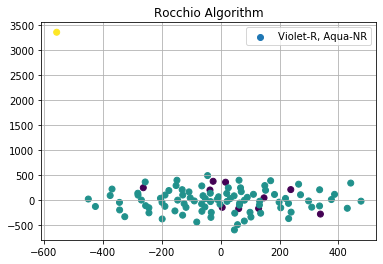

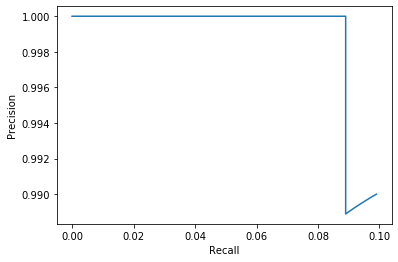

Feedback Iteration  2
Enter  10  relevant documents id of  talk.politics.misc
4426 4432 4318 4215 4302 4332 4235 4339 4701 4335
Marked Relevant Docuemnst: {4426, 4235, 4332, 4302, 4335, 4432, 4339, 4215, 4701, 4318}
Marked Irrelevant Docuemnst:: {4609, 4360, 4361, 4107, 4621, 4365, 4114, 4373, 4378, 4124, 4892, 4128, 4646, 4912, 4657, 4403, 4660, 4661, 4916, 4917, 4924, 4158, 4670, 4414, 4421, 4680, 4937, 4683, 4941, 4686, 4174, 4175, 4942, 4179, 4433, 4947, 4439, 4184, 4956, 4702, 4197, 4199, 4200, 4201, 4457, 4974, 4207, 4208, 4983, 4472, 4226, 4996, 4997, 4748, 4749, 4238, 4757, 4778, 4522, 4268, 4787, 4020, 4792, 4797, 4299, 4303, 4558, 4305, 4049, 4050, 4308, 4052, 4311, 4056, 4828, 4317, 4573, 4320, 4580, 4583, 2543, 4349, 4095}
1  *   Doc id: 4426   Document:  ['talk.politics.misc', '178540']  Score: 24.3004
2  *   Doc id: 4432   Document:  ['talk.politics.misc', '178546']  Score: 23.1441
3  *   Doc id: 4339   Document:  ['talk.politics.misc', '178453']  Score: 21.2572
4  *   Do

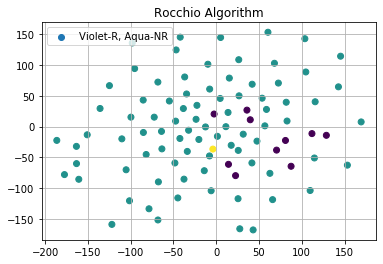

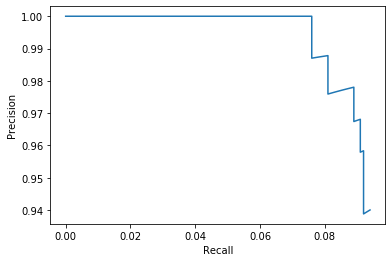

Feedback Iteration  3
Enter  10  relevant documents id of  talk.politics.misc
4580 4426 4299 4305 4378 4472 4317 4360 4320 4828
Marked Relevant Docuemnst: {4320, 4580, 4360, 4426, 4299, 4305, 4472, 4378, 4828, 4317}
Marked Irrelevant Docuemnst:: {4609, 4102, 4361, 4107, 4622, 4111, 4114, 4373, 4124, 4892, 4638, 4640, 4128, 4653, 4912, 4914, 4660, 4916, 4156, 4924, 4158, 4670, 4414, 4415, 4162, 4928, 4421, 3909, 4937, 4683, 4941, 4686, 4174, 4179, 4184, 4954, 4956, 4447, 4199, 4200, 4457, 4974, 4983, 4989, 4226, 4997, 4748, 4749, 4754, 915, 4757, 4763, 4778, 4268, 4530, 4020, 4792, 954, 4028, 4797, 4029, 4292, 4043, 4557, 4303, 4558, 4308, 4311, 4055, 4056, 4316, 4321, 4319, 4061, 4067, 3556, 2543, 242, 4083, 4598, 4862}
1  *   Doc id: 4426   Document:  ['talk.politics.misc', '178540']  Score: 40.5507
2  *   Doc id: 4580   Document:  ['talk.politics.misc', '178695']  Score: 38.285
3 Doc id: 4432   Document:  ['talk.politics.misc', '178546']  Score: 35.4503
4 Doc id: 4318   Document:  ['

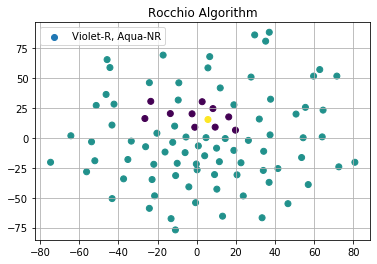

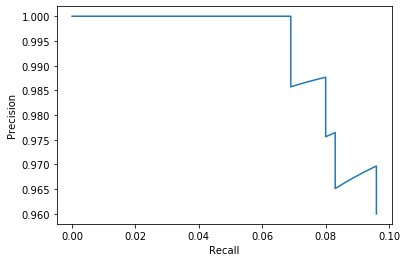

Query: Frequently asked questions on State-of-the-art visualisation tools  Ground Truth: sci.med
Documents from intial query
1 Doc id: 7   Document:  ['comp.graphics', '37919']  Score: 1.3636
2 Doc id: 2010   Document:  ['sci.med', '58052']  Score: 1.3636
3 Doc id: 800   Document:  ['comp.graphics', '38962']  Score: 1.342
4 Doc id: 8   Document:  ['comp.graphics', '37920']  Score: 1.2611
5 Doc id: 2011   Document:  ['sci.med', '58053']  Score: 1.2611
6 Doc id: 4426   Document:  ['talk.politics.misc', '178540']  Score: 0.9937
7 Doc id: 530   Document:  ['comp.graphics', '38692']  Score: 0.8823
8 Doc id: 2730   Document:  ['sci.med', '59370']  Score: 0.8332
9 Doc id: 3495   Document:  ['sci.space', '61146']  Score: 0.8198
10 Doc id: 4432   Document:  ['talk.politics.misc', '178546']  Score: 0.7957
11 Doc id: 971   Document:  ['comp.graphics', '39655']  Score: 0.7489
12 Doc id: 3158   Document:  ['sci.space', '60809']  Score: 0.7184
13 Doc id: 239   Document:  ['comp.graphics', '38400']  

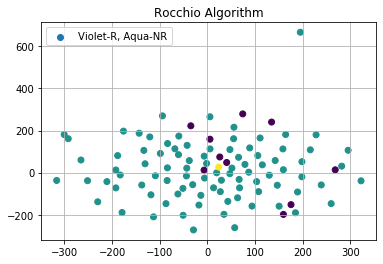

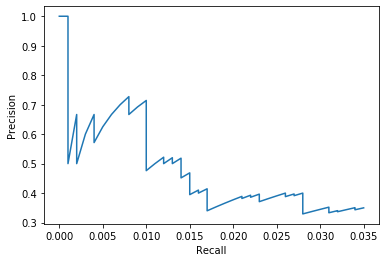

Feedback Iteration  2
Enter  10  relevant documents id of  sci.med
2118 2114 2117 2543 2459 2404 2646 2698 2644 2598
Marked Relevant Docuemnst: {2114, 2404, 2117, 2598, 2118, 2698, 2543, 2644, 2646, 2459}
Marked Irrelevant Docuemnst:: {4609, 4098, 3590, 7, 8, 3082, 2315, 4114, 530, 2067, 4124, 2079, 2848, 3119, 4147, 4917, 4670, 2113, 3398, 840, 4937, 4426, 4941, 4432, 4433, 4179, 4436, 344, 4956, 3684, 4199, 616, 4200, 4457, 4460, 4472, 2942, 2430, 4749, 143, 2707, 915, 4757, 3734, 4760, 4268, 2988, 686, 689, 690, 691, 948, 2484, 2486, 3767, 4792, 2487, 954, 4538, 3004, 4798, 958, 3007, 3008, 4291, 4292, 2244, 3016, 4308, 214, 4311, 215, 216, 2526, 735, 4319, 2272, 3556, 242, 4090}
1  *   Doc id: 2646   Document:  ['sci.med', '59286']  Score: 32.7575
2  *   Doc id: 2644   Document:  ['sci.med', '59284']  Score: 32.6492
3  *   Doc id: 2118   Document:  ['sci.med', '58578']  Score: 31.5306
4  *   Doc id: 2114   Document:  ['sci.med', '58568']  Score: 29.3194
5  *   Doc id: 2543   Docume

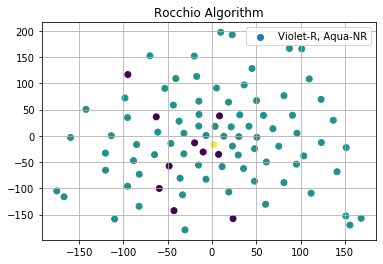

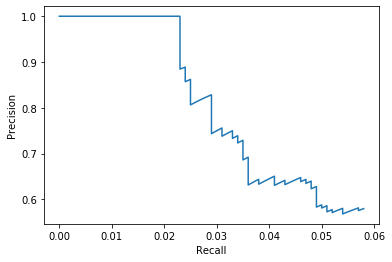

Feedback Iteration  3
Enter  10  relevant documents id of  sci.med
2115 2526 2487 2643 2486 2483 2645 2395 2914 2693
Marked Relevant Docuemnst: {2914, 2115, 2693, 2643, 2483, 2645, 2486, 2487, 2395, 2526}
Marked Irrelevant Docuemnst:: {2819, 2566, 7, 8, 2569, 2315, 2830, 4114, 2067, 2585, 2588, 2848, 2594, 2601, 2859, 2097, 4917, 4670, 2110, 2878, 3398, 2887, 4937, 4941, 4433, 4179, 4436, 4956, 2908, 3684, 2405, 4199, 2664, 616, 4200, 4457, 2410, 4460, 2678, 2424, 2682, 2683, 2430, 2692, 4749, 2707, 915, 4757, 2200, 4760, 2983, 4268, 689, 690, 691, 2484, 4792, 954, 4538, 3004, 3002, 3003, 3008, 3009, 2755, 2244, 3784, 214, 215, 216, 4311, 2010, 2011, 2272, 3556, 2794, 2795, 242, 2549, 4090}
1 Doc id: 2646   Document:  ['sci.med', '59286']  Score: 60.2479
2  *   Doc id: 2486   Document:  ['sci.med', '59125']  Score: 58.4023
3  *   Doc id: 2643   Document:  ['sci.med', '59283']  Score: 58.1092
4  *   Doc id: 2483   Document:  ['sci.med', '59122']  Score: 57.5983
5 Doc id: 2644   Document

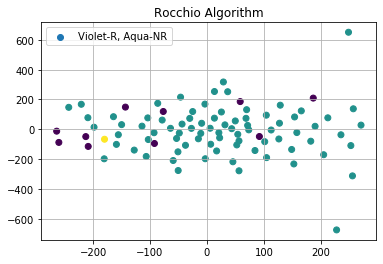

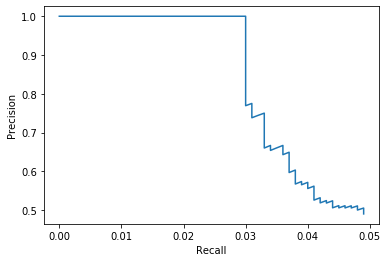

At  1 iteration MAP is:
0.789824971959265
At  2 iteration MAP is:
0.9176032087187913
At  3 iteration MAP is:
0.9374876582166184


In [484]:
a=1  # weights of Rocchio algo
b=0.75
c=0.25
k=100 #top k documensts
p=10
query_list=['Pretty good opinions on biochemistry machines','Scientific tools for preserving rights and body','Frequently asked questions on State-of-the-art visualisation tools']
ground_truth_list=['sci.med','talk.politics.misc','sci.med']
map_overall=[]
for i in range(len(query_list)):
    query=query_list[i]
    ground_truth=ground_truth_list[i]
    print("Query:",query," Ground Truth:",ground_truth)
    query_vector=queryWork(query)
    result,asterisk_doc=intialResult(query_vector)
    map_=RocchiooAlgorithm(query,a,b,c,k,p,ground_truth,length,result,asterisk_doc)
    map_overall.append(map_)

mapCalulcation(map_overall,len(query_list))